Simple Linear Regression with Neural Networks

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random data to train on

In [48]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size = (observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


Create the targets to aim towards

In [49]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


Plot the training data - to verify the presence of the trend our model should learn to reproduce

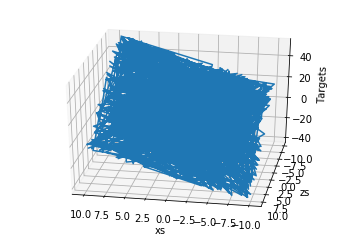

In [50]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim = 100)
plt.show()
targets = targets.reshape(observations,1)

Initialize Variables

In [51]:
#initializing our weights randomly with [-0.1,0.1]
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size = (2,1))
biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(biases)

[[ 0.06038225]
 [-0.03556549]]
[-0.04417076]


Set Learning rate

In [52]:
learning_rate = 0.02

Iterate through outputs to minimize the difference to match the target based on linear regression

In [53]:
for i in range(250):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2)/ 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    
    #wi+1 = wi - n(eta) * Ei(Xi*Deltai)
    weights = weights - learning_rate* np.dot(inputs.T, deltas_scaled)
    #bi+1 = bi - n(eta) * Ei(Deltai)
    biases = biases - learning_rate* np.sum(deltas_scaled)

242.364081969313
30.25400870049402
13.35588274828224
11.612110709672612
11.064931246160725
10.627569992534928
10.214406221795704
9.81808986374535
9.437449348667561
9.071825802625069
8.72062363528786
8.383273762921139
8.05922979478104
7.74796691163745
7.448980996146696
7.161787814732625
6.885922233186008
6.620937463326995
6.366404339391885
6.121910622961923
5.8870603353075275
5.66147311606644
5.4447836072172375
5.236640861350377
5.036707773278513
4.844660534065476
4.660188106589675
4.482991721792571
4.3127843947963385
4.149290460107006
3.992245125150359
3.8413940414174332
3.696492892525111
3.557306998524585
3.42361093581689
3.295188172059861
3.171830715475284
3.0533387779882024
2.93952045165285
2.8301913978411286
2.725174548690233
2.624299820325953
2.5274038373970944
2.4343296684749776
2.344926571889408
2.2590497515894894
2.1765601226338966
2.0973240859307816
2.0212133118624758
1.9481045324445767
1.8778793416827768
1.8104240038041113
1.7456292690520319
1.683390196746975
1.62360598532584

Check the weights and biases to see if it matches up closely to your targets

In [54]:
print(weights, biases)

[[ 2.00175382]
 [-3.00092555]] [5.00615626]


We should expect a 45 degree linear graph

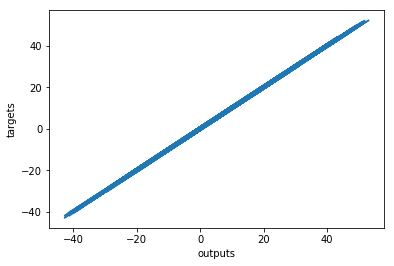

In [43]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()